In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("nifty50minute.csv")
warnings.filterwarnings('ignore')

In [3]:
data.shape
data.head()

Date     open     high      low    close  volume
0  2015-01-09 09:15:00  8285.45  8295.90  8285.45  8292.10       0
1  2015-01-09 09:16:00  8292.60  8293.60  8287.20  8288.15       0
2  2015-01-09 09:17:00  8287.40  8293.90  8287.40  8293.90       0
3  2015-01-09 09:18:00  8294.25  8300.65  8293.90  8300.65       0
4  2015-01-09 09:19:00  8300.60  8301.30  8298.75  8301.20       0

In [4]:
data.reset_index(drop=True, inplace=True)
data.drop(['volume'], axis=1, inplace=True)
data.drop(['Date'], axis=1, inplace=True)

In [5]:
print(data.head())
print(data.shape)
print(data.columns)

      open     high      low    close
0  8285.45  8295.90  8285.45  8292.10
1  8292.60  8293.60  8287.20  8288.15
2  8287.40  8293.90  8287.40  8293.90
3  8294.25  8300.65  8293.90  8300.65
4  8300.60  8301.30  8298.75  8301.20
(932946, 4)
Index(['open', 'high', 'low', 'close'], dtype='object')


In [6]:
# data.plot(legend=True,subplots=True, figsize = (12, 10))
# plt.show()
# #data['Close'].plot(legend=True, figsize = (12, 6))
# #plt.show()
# #data['Volume'].plot(legend=True,figsize=(12,7))
# #plt.show()

# data.shape
# data.size
# data.describe(include='all').T
# data.dtypes
# data.nunique()


In [7]:
# data.reset_index(drop=True, inplace=True)
# #data.fillna(data.mean(), inplace=True)
# data.head()


In [8]:

# data.nunique()

# data.sort_index(axis=1,ascending=True)

# cols_plot = ['Open', 'High', 'Low','Close','Volume']
# axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
# for ax in axes:
#     ax.set_ylabel('Daily trade')

# plt.plot(data['Close'], label="Close price")
# plt.xlabel("Timestamp")
# plt.ylabel("Closing price")
# df = data
# print(df)



In [9]:
data.isnull().sum()
df = data.iloc[466473:,:]

In [10]:
df

open      high       low     close
466473  12043.40  12046.60  12043.40  12046.40
466474  12045.85  12049.25  12045.10  12048.35
466475  12048.15  12049.60  12048.15  12049.60
466476  12048.95  12049.75  12048.00  12048.75
466477  12048.15  12051.25  12048.15  12051.25
...          ...       ...       ...       ...
932941  23569.45  23570.60  23567.00  23568.10
932942  23568.10  23570.25  23565.30  23567.40
932943  23569.00  23578.35  23565.40  23576.50
932944  23577.05  23578.60  23567.45  23568.10
932945  23568.10  23571.35  23557.35  23563.15

[466473 rows x 4 columns]

In [11]:
# cols_plot = ['Open', 'High', 'Low','Close']
# axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
# for ax in axes:
#     ax.set_ylabel('Daily trade')

In [14]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=120
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,3]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 3] - first) / first)
    for k in range(1):
        temp2.append((df.iloc[i+k + window_size, 3] - first) / first)
    X.append(np.array(temp).reshape(window_size, 1))
    Y.append(np.array(temp2))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,window_size,1)
test_X = test_X.reshape(test_X.shape[0],1,window_size,1)

print(len(train_X))
print(len(test_X))
     

373080
93271


In [32]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],window_size ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=20,batch_size=64, verbose=1, shuffle =False)
     

Epoch 1/20
5830/5830 [==============================] - 11s 2ms/step - loss: 2.3984e-06 - mse: 2.3984e-06 - mae: 8.4580e-04 - val_loss: 1.0078e-06 - val_mse: 1.0078e-06 - val_mae: 5.1691e-04
Epoch 2/20
5830/5830 [==============================] - 10s 2ms/step - loss: 9.9044e-07 - mse: 9.9044e-07 - mae: 5.9391e-04 - val_loss: 8.9498e-07 - val_mse: 8.9498e-07 - val_mae: 4.7863e-04
Epoch 3/20
5830/5830 [==============================] - 9s 2ms/step - loss: 9.0689e-07 - mse: 9.0689e-07 - mae: 5.5159e-04 - val_loss: 7.6889e-07 - val_mse: 7.6889e-07 - val_mae: 4.0580e-04
Epoch 4/20
5830/5830 [==============================] - 9s 2ms/step - loss: 7.8568e-07 - mse: 7.8568e-07 - mae: 5.1459e-04 - val_loss: 7.4400e-07 - val_mse: 7.4400e-07 - val_mae: 3.8724e-04
Epoch 5/20
5830/5830 [==============================] - 9s 1ms/step - loss: 7.6150e-07 - mse: 7.6150e-07 - mae: 4.9994e-04 - val_loss: 7.3282e-07 - val_mse: 7.3282e-07 - val_mae: 4.0178e-04
Epoch 6/20
5830/5830 [==========================

The Value used in Table for performance is from here

In [33]:
model.evaluate(test_X, test_Y)

2915/2915 [==============================] - 2s 567us/step - loss: 6.8669e-07 - mse: 6.8669e-07 - mae: 3.7371e-04


[6.866874855404603e-07, 6.866874855404603e-07, 0.0003737100341822952]

2915/2915 [==============================] - 2s 562us/step


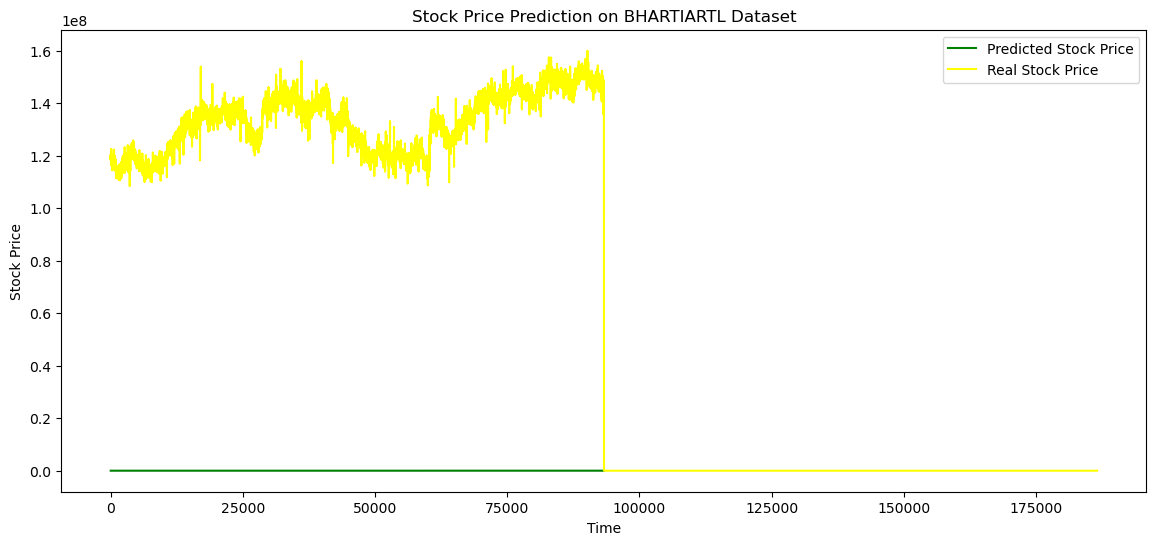

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Make predictions on the test set
predicted = model.predict(test_X)

# Step 2: Reverse the normalization for predicted and actual values
# Reshape predictions to match the original format and invert normalization
predicted = np.array(predicted[:, 0]).reshape(-1, 1)

# Initialize test labels and reverse normalization
test_label = test_Y.reshape(-1, 1)

# Reverse the normalization using the original stock price (since we normalized relative changes)
len_t = len(train_X)
for j in range(len_t, len_t + len(test_X)):
    temp = data.iloc[j, 3]  # Get the original stock price
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp

# Step 3: Plotting the results
plt.figure(figsize=(14, 6))

# Plot predicted stock prices (green line)
plt.plot(predicted, color='green', label='Predicted Stock Price')

# Plot real stock prices (yellow line)
plt.plot(test_label, color='yellow', label='Real Stock Price')

# Adding labels and title
plt.title('Stock Price Prediction on BHARTIARTL Dataset')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()


2915/2915 [==============================] - 2s 517us/step


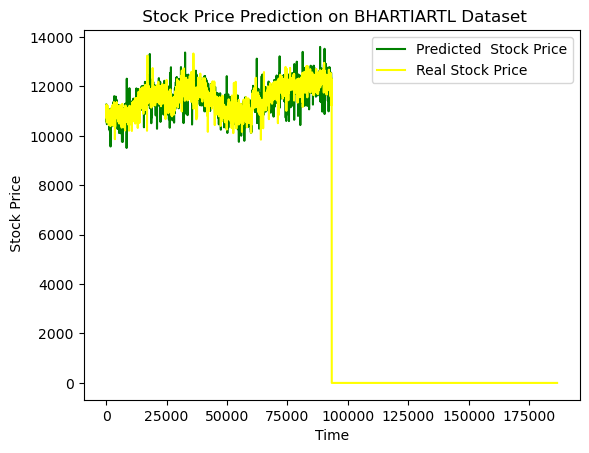

In [34]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on BHARTIARTL Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [149]:
# plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
# plt.plot(test_label, color = 'red', label = 'Real Stock Price')
# plt.title(' Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel(' Stock Price')
# plt.legend()
# plt.show()

In [42]:
predicted.shape


(93271, 1)

In [53]:
test_Y.shape

(93271, 2)

In [47]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_Y]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

       Actual Price  Predicted Price
0      10909.920319     10916.931641
1      10842.057461     10833.320312
2      10838.141114     10835.186523
3      10905.681898     10910.686523
4      11005.028642     11006.142578
...             ...              ...
93266     -0.003488     12029.296875
93267      0.004126     12121.892578
93268      0.002804     12106.803711
93269      0.004654     12127.457031
93270     -0.002117     12045.268555

[93271 rows x 2 columns]


In [72]:
# from tabulate import tabulate
# table = tabulate(res, headers='keys', tablefmt='pretty')
# print(table)

In [150]:
# model.summary()

In [81]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))

In [36]:

yhat_probs = model.predict(test_X, verbose=0)

In [201]:
import numpy as np

# Preprocessing the 60 values from the DataFrame
def preprocess_and_predict(df, model):
    """
    Preprocess the given 60 values in the DataFrame and predict the 61st value using the trained model.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame containing stock prices. Column 2 is assumed to have the stock prices.
        model (keras.Model): The trained model for predicting the stock price.
    
    Returns:
        float: Predicted value for the 61st stock price.
    """
    # Ensure the DataFrame has at least 60 rows
    if len(df) < window_size:
        raise ValueError("The DataFrame must have at least 60 rows.")

    # Extract the first price (reference value)
    first = df.iloc[0, 2]
    
    # Normalize the 60 values
    temp = []
    for j in range(window_size):
        temp.append((df.iloc[j, 2] - first) / first)
    
    # Convert the data to the shape expected by the model
    input_data = np.array(temp).reshape(1, 1, window_size, 1)
    
    # Predict the 61st value
    normalized_prediction = model.predict(input_data)[0][0]
    
    # Denormalize the prediction
    predicted_value = normalized_prediction * first + first
    
    return predicted_value

# Example usage
# Assuming 'df' is your DataFrame containing stock prices with the second column as stock prices
# and 'model' is your trained model

# Call the function and predict
predicted_61st_value = preprocess_and_predict(df, model)
print(f"The predicted 61st value is: {predicted_61st_value}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The predicted 61st value is: 4002.2584276836005
